#Tarefa 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df1 = pd.read_csv("ptbdb_abnormal.csv")
df2 = pd.read_csv("ptbdb_normal.csv")
df3 = pd.read_csv("mitbih_train.csv")
df4 = pd.read_csv("mitbih_test.csv")

datasets = [df1, df2, df3, df4]
names = ["Anormal", "Normal", "Train", "Teste"]

/tmp/ipython-input-1508182303.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("ptbdb_abnormal.csv")
/tmp/ipython-input-1508182303.py:4: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("mitbih_test.csv")


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [4]:
# Concatena os 4 datasets
df = pd.concat(datasets, ignore_index=True)
print("Formato total:", df.shape)

Formato total: (18100, 528)


In [5]:
#Remove colunas não numéricas
df = df.select_dtypes(include=[np.number]).astype(float)
print("Formato após remover não numéricas:", df.shape)

Formato após remover não numéricas: (18100, 526)


In [6]:
#Tratar valores ausentes
# Estratégia simples: preencher NaN com o valor da média da coluna
df = df.fillna(df.mean())

# Verificação final
print("Total de NaN restantes:", df.isna().sum().sum())

Total de NaN restantes: 0


In [7]:
#Padronizar as features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [8]:
#PCA para reduzir de 187 → 2 dimensões
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("Formato PCA:", X_pca.shape)


Formato PCA: (18100, 2)


In [9]:
# K-Means com 5 clusters
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df_clusters = pd.DataFrame({
    "Cluster": clusters,
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1]
})

print("Clusters gerados com sucesso!")

Clusters gerados com sucesso!


In [10]:
#Comparação entre clusters
cluster_sizes = df_clusters["Cluster"].value_counts().sort_index()
cluster_sizes

,count
Cluster,
0,9503
1,877
2,637
3,1748
4,5335


Cluster
0    9503
1     877
2     637
3    1748
4    5335
Name: count, dtype: int64


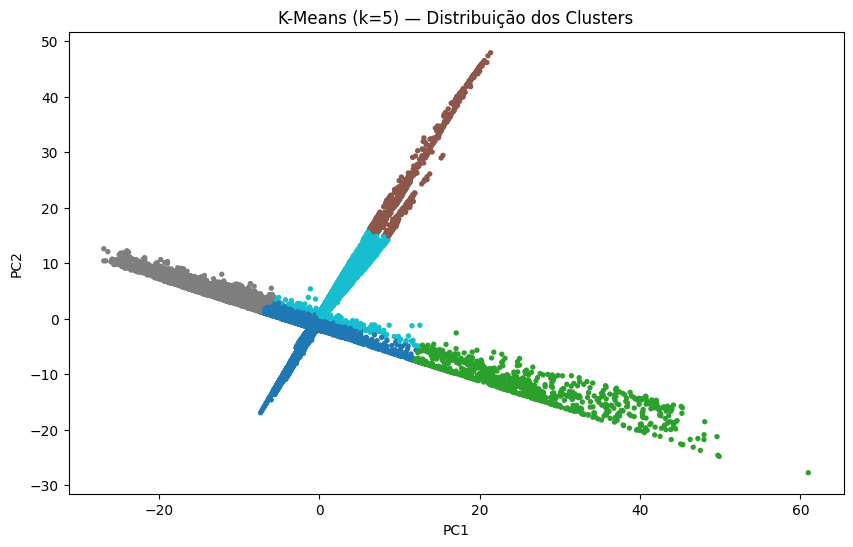

In [11]:
print(df_clusters["Cluster"].value_counts().sort_index())

# =====================================================
# 6. Plot dos clusters
# =====================================================

plt.figure(figsize=(10, 6))
plt.scatter(df_clusters["PC1"], df_clusters["PC2"], c=df_clusters["Cluster"], cmap="tab10", s=8)
plt.title("K-Means (k=5) — Distribuição dos Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

##PRINT

In [12]:
for name, df in zip(names, datasets):
    print(f"=== {name} ===")
    display(df.head())
    print(df.info())
    print("\n\n")

=== Anormal ===


,9.322328567504882812e-01,8.696785569190979004e-01,8.861859440803527832e-01,9.296264052391052246e-01,9.087749719619750977e-01,9.339704513549804688e-01,8.010425567626953125e-01,7.497828006744384766e-01,6.872285008430480957e-01,6.350998878479003906e-01,...,0.000000000000000000e+00.117,0.000000000000000000e+00.118,0.000000000000000000e+00.119,0.000000000000000000e+00.120,0.000000000000000000e+00.121,0.000000000000000000e+00.122,0.000000000000000000e+00.123,0.000000000000000000e+00.124,0.000000000000000000e+00.125,1.000000000000000000e+00.1
0,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4685 entries, 0 to 4684
Columns: 188 entries, 9.322328567504882812e-01 to 1.000000000000000000e+00.1
dtypes: float64(187), object(1)
memory usage: 6.7+ MB
None



=== Normal ===


,1.000000000000000000e+00,9.003241658210754395e-01,3.585899472236633301e-01,5.145867168903350830e-02,4.659643396735191345e-02,1.268233358860015869e-01,1.333063244819641113e-01,1.191247999668121338e-01,1.106158867478370667e-01,1.130470037460327148e-01,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.948983,0.505265,0.004176,0.022513,0.059550,0.107298,0.110385,0.111293,0.116558,0.118192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 5.8 MB
None



=== Train ===


,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 6.4 MB
None



=== Teste ===


,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4908 entries, 0 to 4907
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(187), object(1)
memory usage: 7.0+ MB
None





#Tarefa 2

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [14]:
df1 = pd.read_csv("ptbdb_abnormal.csv")
df2 = pd.read_csv("ptbdb_normal.csv")
df3 = pd.read_csv("mitbih_train.csv")
df4 = pd.read_csv("mitbih_test.csv")

datasets = [df1, df2, df3, df4]
names = ["Anormal", "Normal", "Train", "Teste"]

/tmp/ipython-input-1508182303.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("ptbdb_abnormal.csv")
/tmp/ipython-input-1508182303.py:4: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("mitbih_test.csv")


##Concatenação


In [15]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

#Concatenar os datasets

df = pd.concat(datasets, ignore_index=True)
print("Formato inicial:", df.shape)

Formato inicial: (18100, 528)


In [16]:
# Separar X e y (última coluna é o rótulo)
X = df.iloc[:, :-1]     # 187 features
y = df.iloc[:, -1]      # rótulo (string ou número)

In [17]:
df = pd.concat(datasets, ignore_index=True)
print("Formato inicial:", df.shape)

Formato inicial: (18100, 528)


In [18]:
#Converter rótulos para números se necessário

mapping = None
if y.dtype == object:
    classes = sorted(y.unique())
    mapping = {cls: i for i, cls in enumerate(classes)}
    y = y.map(mapping)

print("\nMapeamento usado (se houver):", mapping)
print("Distribuição das classes:\n", y.value_counts())


Mapeamento usado (se houver): None
Distribuição das classes:
 6.818182021379470825e-02.3
0.000000    3468
1.000000      11
0.333333       3
0.062500       3
0.338235       3
            ... 
0.970779       1
0.005155       1
0.037940       1
0.286364       1
0.068826       1
Name: count, Length: 1394, dtype: int64


.


In [19]:
# Remover colunas não-numéricas em X
X = X.select_dtypes(include=[np.number]).astype(float)

# Preencher NaN com média
X = X.fillna(X.mean())
X = X.fillna(X.mean())

# Padronizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:
# PCA para 2 dimensões
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# K-Means
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_pca)

df_clusters = pd.DataFrame({
    "Cluster": clusters,
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "Label": y
})

print("\nTamanho dos clusters:")
print(df_clusters["Cluster"].value_counts().sort_index())


Tamanho dos clusters:
Cluster
0    1749
1    5358
2     879
3     638
4    9476
Name: count, dtype: int64


In [21]:
print("\nTabela de comparação Cluster x Classe:")
print(pd.crosstab(df_clusters["Cluster"], df_clusters["Label"]))


Tabela de comparação Cluster x Classe:
Label    0.000000  0.001736  0.005155  0.005731  0.006826  0.008333  0.010101  \
Cluster                                                                         
1             845         1         0         0         1         0         0   
3              27         0         0         0         0         0         0   
4            2596         0         1         1         0         1         1   

Label    0.011710  0.012605  0.013619  ...  0.968553  0.970480  0.970779  \
Cluster                                ...                                 
1               0         0         1  ...         1         0         1   
3               0         0         0  ...         0         0         0   
4               1         2         0  ...         0         1         0   

Label    0.973485  0.977401  0.979079  0.985366  0.992832  0.996047  1.000000  
Cluster                                                                        
1            

##Rede neural

In [22]:
# Remover registros onde y é nulo
mask = y.notna()
X_clean = X[mask]
y_clean = y[mask]

# Re-escalar após limpeza
X_scaled = scaler.fit_transform(X_clean)

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_clean,
    test_size=0.2,
    random_state=42,

)

# Arquitetura do modelo
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=128,
    verbose=1
)

# Avaliação
loss, acc = model.evaluate(X_test, y_test)
print(f"\nAcurácia final no teste: {acc:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4885 - loss: 0.9467 - val_accuracy: 0.7325 - val_loss: 0.0112
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.7085 - loss: 0.0065 - val_accuracy: 0.7325 - val_loss: 0.0079
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7051 - loss: 0.0123 - val_accuracy: 0.7325 - val_loss: 0.0054
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6898 - loss: 0.0138 - val_accuracy: 0.7325 - val_loss: 0.0047
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6925 - loss: 0.0077 - val_accuracy: 0.7325 - val_loss: 0.0043
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6946 - loss: 0.0103 - val_accuracy: 0.7325 - val_loss: 0.0043
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6859 - loss: 0.0094 - val_accuracy: 0.7325 - val_loss: 0.0036
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7014 - loss: 0.0101 - val_accuracy: 0.7325 - v

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


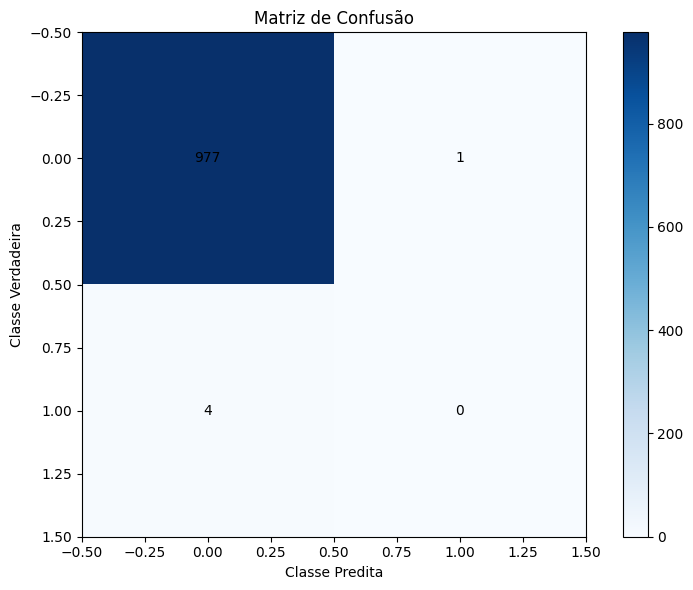

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Previsões do modelo em probabilidades
y_pred_proba = model.predict(X_test)

# Converter probabilidades em classes (0–4)
y_pred = np.argmax(y_pred_proba, axis=1)

# Garantir que os verdadeiros sejam inteiros
y_true = y_test.astype(int).values

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")

# Inserir valores nas células
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color="black")

plt.colorbar()
plt.tight_layout()
plt.show()


In [24]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


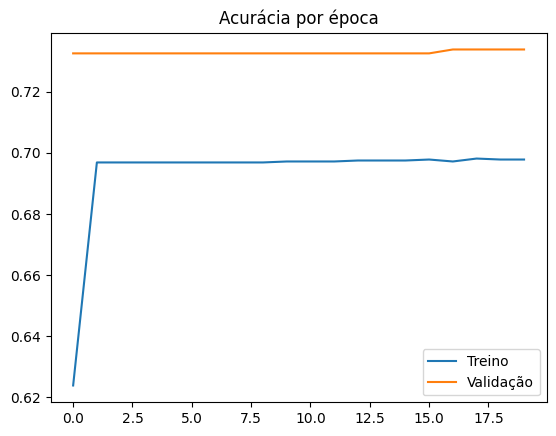

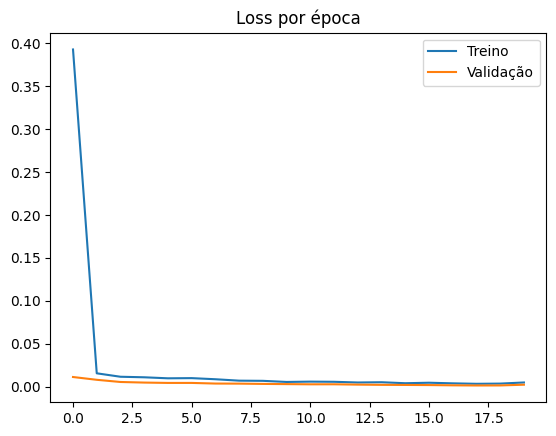

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia por época')
plt.legend(['Treino','Validação'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss por época')
plt.legend(['Treino','Validação'])
plt.show()


In [26]:
# Probabilidades previstas
y_prob = model.predict(X_test)

# Converter para classe prevista (0–4)
y_pred = np.argmax(y_prob, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Se val_accuracy < train_accuracy → overfitting

Se ambas são baixas → underfitting

Se ambas são altas e próximas → bom ajuste

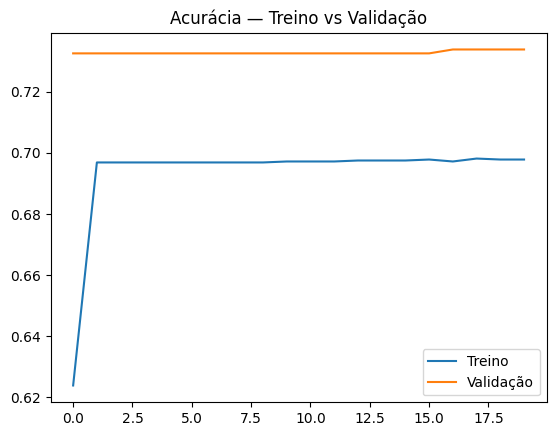

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend()
plt.title("Acurácia — Treino vs Validação")
plt.show()


Se a val_loss sobe enquanto train_loss desce → overfitting

Se ambas são altas → underfitting

Se ambas convergem → bom modelo

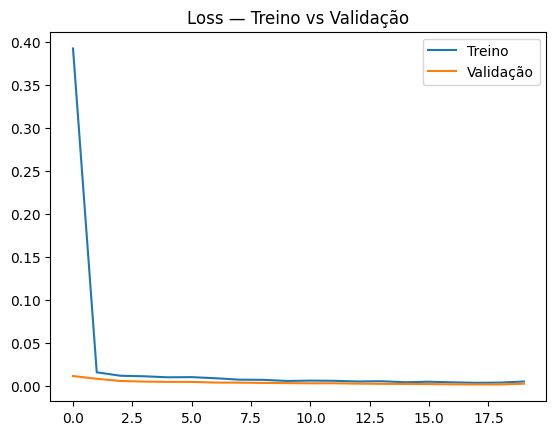

In [28]:
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.legend()
plt.title("Loss — Treino vs Validação")
plt.show()